In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 145480 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.23-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [2]:
!mkdir drive
!google-drive-ocamlfuse drive

In [4]:
import os 
os.chdir("/content/drive/Colab_Notebooks/23december")
!pwd

/content/drive/Colab_Notebooks/23december


In [6]:
#import modules
#https://keras.io/api/datasets/mnist/
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.utils import np_utils

import matplotlib.pyplot as plt


In [7]:
#https://keras.io/examples/vision/mnist_convnet/
# the data, split between train and test sets

(x_train, y_train), (x_test, y_test) = mnist.load_data()



11493376/11490434 [==============================] - 0s 0us/step


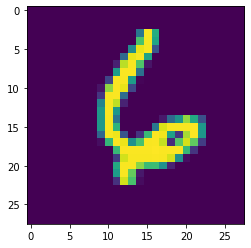

In [26]:
x_train[5000]

plt.imshow(x_train[59000])

In [35]:
#mnist split dataset to 2 parts: train(size=60000), test(size=10000)
#A standard split of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model and a separate set of 10,000... 
#images are used to test it.
print(len(x_train),len(y_train),len(x_test),len(y_test))


60000 60000 10000 10000


In [36]:
#Each image is a 28 by 28 pixel square (784 pixels total).

x_train[5].size

784

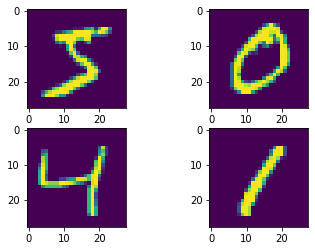

In [40]:
plt.subplot(221)
plt.imshow(x_train[0])
plt.subplot(222)
plt.imshow(x_train[1])
plt.subplot(223)
plt.imshow(x_train[2])
plt.subplot(224)
plt.imshow(x_train[3])
# show the plot
plt.show()